## **Quiz ML No. 1**

---

### Multi Linear Regression using Gradient Descent

Nama  : William Yulio

NIM   : 2301869840

Kelas : LD01

### Import Library yang akan digunakan

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

### Membaca Data Input dari CSV

In [2]:
data = pd.read_csv('housing.csv',  delim_whitespace = True, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
data.head()

# Karena pada dataset didalam CSV tergabung kedalam 1 cell
# Maka harus kita pisahkan dengan menggunakan fungsi delim_whitespace 
# dan juga memberikan penamaan terhadap setiap kolom yang ada

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Feature Engineering

In [3]:
df_numeric = data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# Memasukkan feature kedalam df_numeric untuk dicek apakah termasuk kolom yang berformat np.number atau tidak
# menggunakan variabel pembantu numeric_cols untuk menampung kolom-kolom yang sudah dicek sebelumnya

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'MEDV']


### Data Cleaning 

In [4]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
# Melakukan check apakah terdapat missing value atau tidak
# Dikarenakan tidak terdapat missing value maka kita bisa lanjut ketahap selanjutnya

CRIM - 0%
ZN - 0%
INDUS - 0%
CHAS - 0%
NOX - 0%
RM - 0%
AGE - 0%
DIS - 0%
RAD - 0%
TAX - 0%
PTRATIO - 0%
B - 0%
LSTAT - 0%
MEDV - 0%


In [5]:
Correlation = data.corr()
Correlation['MEDV'].abs().sort_values(ascending = False)
# Selanjutnya kita akan melihat variabel mana yang memiliki korelasi tertinggi dengan variabel output
# Kita akan melakukan proses seleksi variabel bebas mana yang akan dimasukkan kedalam model
# Variabel bebas yang akan diambil merupakan variabel yang memiliki korelasi >= 0.35
# Variabel yang dibawah 0.35 akan didrop dari tabel dataset

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

### Melakukan pemetaan terhadap data input dan output kedalam variabel x dan y 

In [6]:
X = data.iloc[:, :-1]    # independent varible
y = data.iloc[:, -1]     # dependent variable

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [7]:
X = X.drop(['CHAS','DIS','B'], axis=1)
X.head()

# Kemudian variabel yang sebelumnya sudah kita lihat korelasinya dengan variabel independent
# akan didrop, sehingga kita hanya akan menggunakan variabel dengan korelasi yang tinggi saja

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,2,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,3,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,3,222.0,18.7,5.33


### Melakukan Standard Scaler terhadap dataset

In [8]:
sc = StandardScaler()
X = sc.fit_transform(X)
print (X[:10])

# Pada tahap ini kita akan berfokus untuk melakukan preprocessing sehingga dataset menjadi lebih mudah untuk diolah
# menggunakan fungsi StandardSCaler() 

[[-0.41978194  0.28482986 -1.2879095  -0.14421743  0.41367189 -0.12001342
  -0.98284286 -0.66660821 -1.45900038 -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 -0.74026221  0.19427445  0.36716642
  -0.8678825  -0.98732948 -0.30309415 -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 -0.74026221  1.28271368 -0.26581176
  -0.8678825  -0.98732948 -0.30309415 -1.2087274 ]
 [-0.41675042 -0.48772236 -1.30687771 -0.83528384  1.01630251 -0.80988851
  -0.75292215 -1.10611514  0.1130321  -1.36151682]
 [-0.41248185 -0.48772236 -1.30687771 -0.83528384  1.22857665 -0.51117971
  -0.75292215 -1.10611514  0.1130321  -1.02650148]
 [-0.41704368 -0.48772236 -1.30687771 -0.83528384  0.20709638 -0.35115713
  -0.75292215 -1.10611514  0.1130321  -1.04332233]
 [-0.41024282  0.04877224 -0.47665354 -0.26515405 -0.38841095 -0.07022862
  -0.52300145 -0.57751897 -1.50523663 -0.03126762]
 [-0.40369567  0.04877224 -0.47665354 -0.26515405 -0.16046556  0.97880825
  -0.52300145 -0.57751897 -1.50523663  0.91070021]


### Melakukan Split Dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Kita akan melakukan pemisahan dataset utuh kedalam variabel untuk melakukan testing dan juga training
# Dimana data yang akan digunakan untuk test sebesar 20% dari total data utuhnya dan 80% lainnya dimasukkan kedalam variabel training

In [10]:
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]                        
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]
# Kemudian data training dan test akan di sesuaikan shapenya berdasarkan jumlah dari data yang ada pada setiap variabelnya
# Selanjutnya dijadikan stack array 2D

### Rumus untuk menghitung MLR menggunakan Gradient Descent

In [11]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y)**2)/(2 * m)
    return J
# Rumus Cost function untuk MLR 

In [12]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
 
    for iteration in range(iterations):
     # Hypothesis Values
         h = X.dot(B)
     # Difference b/w Hypothesis and Actual Y
         loss = h - Y
     # Gradient Calculation
         gradient = X.T.dot(loss) / m
     # Changing Values of B using Gradient
         B = B - alpha * gradient
     # New Cost Value
         cost = cost_function(X, Y, B)
         cost_history[iteration] = cost
 
    return B, cost_history

### Kalkulasi Predict Value

In [17]:
B = np.zeros(X_train.shape[1])
alpha = 0.01
iter_ = 3000
newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iter_)

# Pada perhitungan ini saya menggunakan Epoch/iter sebesar 3000 dan learning rate/alpha sebesar 0.01

Text(0.5, 1.0, 'Error vs. Training Epoch')

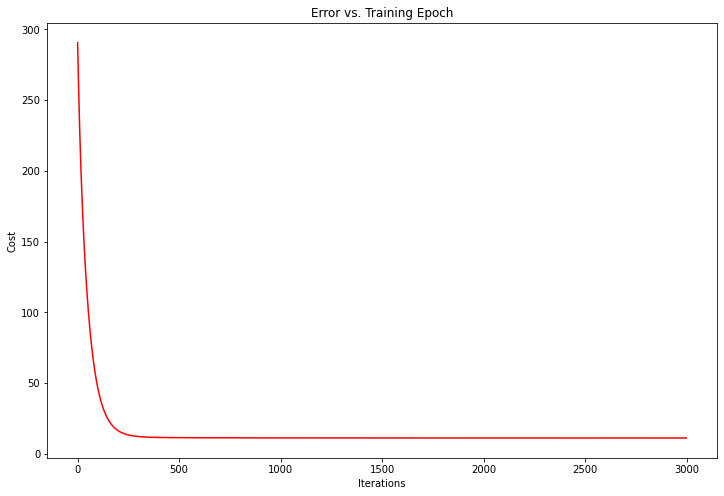

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iter_), cost_history, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# Kemudian saya melakukan plotting untuk melihat hasil perbandingan antara training dengan cost function
# Dan mendapatkan hasil yang cukup oke, walaupun mungkin untuk mendapatkan data yang lebih baik
# Kita bisa meningkatkan Epoch atau mengatur Learning rate yang lebih bagus

In [19]:
y_pred = X_test.dot(newB)
print (y_pred[:-1])
print('\n')
print (y_test[:-1])

# Berikut adalah hasil dari predict value dan hasil dari testing

[24.89828502 22.35297262 28.19703777 11.04923955 22.43369972 19.6138132
 19.52828496 21.81031137 16.23054424 21.4023842   8.62790555 17.73944983
 17.60878254  3.67206237 39.38786824 33.37108505 22.01724559 37.66970845
 28.95098039 21.8923217  25.07140552 25.90151978 18.39139255 27.79876315
 22.34264603 10.1284505  18.20922865 20.77858225 35.57257509 20.11334126
 17.61478969 18.03890224 24.54020836 25.40514565 27.90556701 16.77929464
 10.0248753  20.73736466 18.63533262 14.92328722 27.20600672 20.63872406
 23.61367146 14.85905939 26.27003525 26.95256957 23.05546018 22.88006165
 10.091047   23.23625705 22.43128423 14.5758233  24.01447924 34.4437105
 14.60720268 22.59636078 21.32662153 19.94909571 16.37902836 20.29234573
 22.09886842 21.73678826 32.32206835 29.27076127 16.28097279 30.71966929
 19.3268148  23.67689501 19.28551232 21.41012995 23.43185684 24.22826837
 29.21776911 29.16364008 26.04849453  2.98794009 37.61876874 24.03584217
 25.90407652 18.18707035 29.56247139 19.02306262 17.9

In [20]:
total_data = len(data)

MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
score = r2_score(y_test, y_pred)
r2adj = 1 - (1 - score)*((total_data - 1) / (total_data - 4 - 1))

print ("MSE :", MSE)
print ("RMSE :", RMSE)
print ("R2 :", score)
print ("Adjusted R-Squared :", r2adj)

# Pada tahap terakhir kita akan menghitung akurasi dan error dari perhitungan sebelumnya
# Dan didaptkan akurasi sebesar 0.51, hasil ini menurut saya cukup oke.
# Hal ini mungkin terjadi karena ada beberapa outlier yang belum di bersihkan dari data
# Ataupun terdapat variabel bebas yang tidak sesuai korelasinya dengan variabel output

MSE : 39.547781964277966
RMSE : 6.288702725068022
R2 : 0.5143246951569952
Adjusted R-Squared : 0.51044704801254
